# Household Hazardous Waste Notebook

This notebook is based on:
 
[1] Statistics Canada, “Table 38-10-0155-01  Household hazardous waste.” Statistics Canada, Jul. 18, 2022. doi: https://doi.org/10.25318/3810015501-eng. Available: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810015501&pickMembers%5B0%5D=1.21&cubeTimeFrame.startYear=2011&cubeTimeFrame.endYear=2021&referencePeriods=20110101%2C20210101

I set the city to be Montreal only. I use this notebook to plot interesting household hazardous waste data for the city of Montreal.

**Problems**: This dataset contains cells that have certain special notations that I handle in different ways.
  - Cells that have a `E` after their value are to be used with caution, according to Statscan. For the purposes of demonstration, I treat those values at face-value and remove the `E` from the value.
  - Cells that have a `F` in them are too unreliable to be published, according to Statscan. I treat those as `NaN` values. 

In [1]:
from pathlib import Path
from re import sub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utilities import add_bar_labels

In [2]:
# Set the file path
file_path = Path('images/hazardous_waste/')
file_path.mkdir(parents=True, exist_ok=True)

## Get all the data

In [3]:
# Read the data
house_waste = pd.read_csv('data/Household Hazardous Waste.csv')
house_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication 2,41,48,51,48,47,44
1,Put leftover or expired medication in the garb...,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,F,3E,F,F,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,F,F,F,F,F,F
5,Still had leftover or expired medication at th...,F,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,F,F,F,F,F,F
7,Medical sharps 2,8E,9,11E,10,10,11
8,Put medical sharps in the garbage 4,F,F,F,F,F,14E
9,Used a medical sharps disposal program 4,F,19E,F,28E,F,14E


**Of these data, we only care about batteries.**

In [4]:
# Clean up the Household hazardous waste column
house_waste['Household hazardous waste'] = house_waste['Household hazardous waste'].apply(lambda x: sub(f'\d+', '', x).strip())
house_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,F,3E,F,F,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,F,F,F,F,F,F
5,Still had leftover or expired medication at th...,F,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,F,F,F,F,F,F
7,Medical sharps,8E,9,11E,10,10,11
8,Put medical sharps in the garbage,F,F,F,F,F,14E
9,Used a medical sharps disposal program,F,19E,F,28E,F,14E


In [5]:
# Replace all the `F` with `NaN`
house_waste = house_waste.replace('F', np.nan)
house_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,NaN,3E,NaN,NaN,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8E,9,11E,10,10,11
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14E
9,Used a medical sharps disposal program,NaN,19E,NaN,28E,NaN,14E


In [6]:
# Replace all the `..` with `NaN`
house_waste = house_waste.replace('..', np.nan)
house_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9E,8E,15,14
2,Took or sent leftover or expired medication to...,NaN,3E,NaN,NaN,6E,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9E,10E,8E,11,13
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8E,9,11E,10,10,11
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14E
9,Used a medical sharps disposal program,NaN,19E,NaN,28E,NaN,14E


In [7]:
# Go through the year columns. Replace all the cells with an `E` with just the number in that cell
for col in house_waste.columns[1:]:
    house_waste[col] = house_waste[col].apply(lambda x: sub(r'(\d+)E', r'\1', x) if type(x) is str else x)
house_waste

,Household hazardous waste,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9,8,15,14
2,Took or sent leftover or expired medication to...,NaN,3,NaN,NaN,6,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9,10,8,11,13
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8,9,11,10,10,11
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14
9,Used a medical sharps disposal program,NaN,19,NaN,28,NaN,14


In [8]:
# Rename the first column
house_waste = house_waste.rename(columns={'Household hazardous waste': 'field'})
house_waste

,field,2011,2013,2015,2017,2019,2021
0,Leftover or expired medication,41,48,51,48,47,44
1,Put leftover or expired medication in the garbage,21,11,9,8,15,14
2,Took or sent leftover or expired medication to...,NaN,3,NaN,NaN,6,8
3,Returned leftover or expired medication to a s...,71,80,84,84,73,69
4,Poured leftover or expired medication down the...,NaN,NaN,NaN,NaN,NaN,NaN
5,Still had leftover or expired medication at th...,NaN,9,10,8,11,13
6,Did something else with leftover or expired me...,NaN,NaN,NaN,NaN,NaN,NaN
7,Medical sharps,8,9,11,10,10,11
8,Put medical sharps in the garbage,NaN,NaN,NaN,NaN,NaN,14
9,Used a medical sharps disposal program,NaN,19,NaN,28,NaN,14


In [9]:
# Ensure the proper types
house_waste = house_waste.astype(
    {'2011': float, '2013': float, 
     '2015': float, '2017': float,
     '2019': float, '2021': float}
)

## Process the battery-related data only

In [10]:
# Get only the battery related data
batteries = house_waste[
    (house_waste['field'].str.contains('batteries')) & 
    (house_waste.iloc[:, 1:].notna().any(axis=1))
].reset_index(drop=True)

batteries

,field,2011,2013,2015,2017,2019,2021
0,Dead or unwanted batteries (excluding car batt...,60.0,61.0,70.0,60.0,68.0,67.0
1,Put dead or unwanted batteries (excluding car ...,30.0,19.0,14.0,11.0,15.0,14.0
2,Took or sent dead or unwanted batteries (exclu...,50.0,56.0,59.0,52.0,60.0,63.0
3,Returned dead or unwanted batteries (excluding...,8.0,16.0,15.0,18.0,14.0,11.0
4,Still had dead or unwanted batteries (excludin...,17.0,14.0,15.0,17.0,14.0,18.0
5,Did something else with dead or unwanted batte...,2.0,4.0,4.0,10.0,4.0,NaN


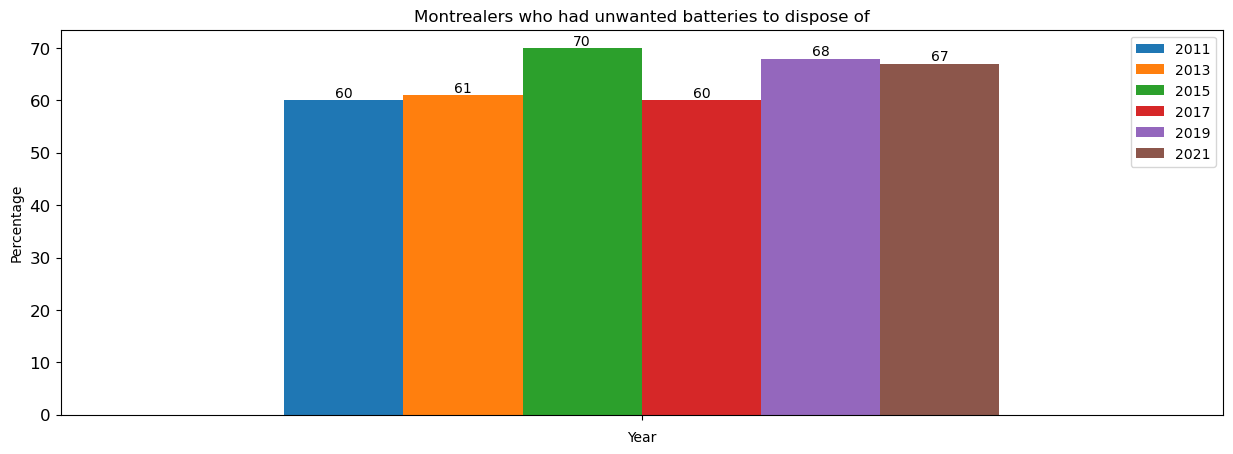

In [11]:
# Create subplots for Plot 1
fig1, ax1 = plt.subplots(figsize=(15, 5))

# Plot 1: Bar graph of Montrealers who had unwanted batteries to dispose of
had_unwanted = batteries[batteries['field'].str.contains('Dead or unwanted')].iloc[:, 1:]
had_unwanted.plot(kind='bar', ax=ax1, width=0.8, fontsize=12)
ax1.set_xticklabels('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Montrealers who had unwanted batteries to dispose of')
add_bar_labels(ax1)

# Save the plot
fig1.savefig(file_path / 'batteries_main_plot.png')

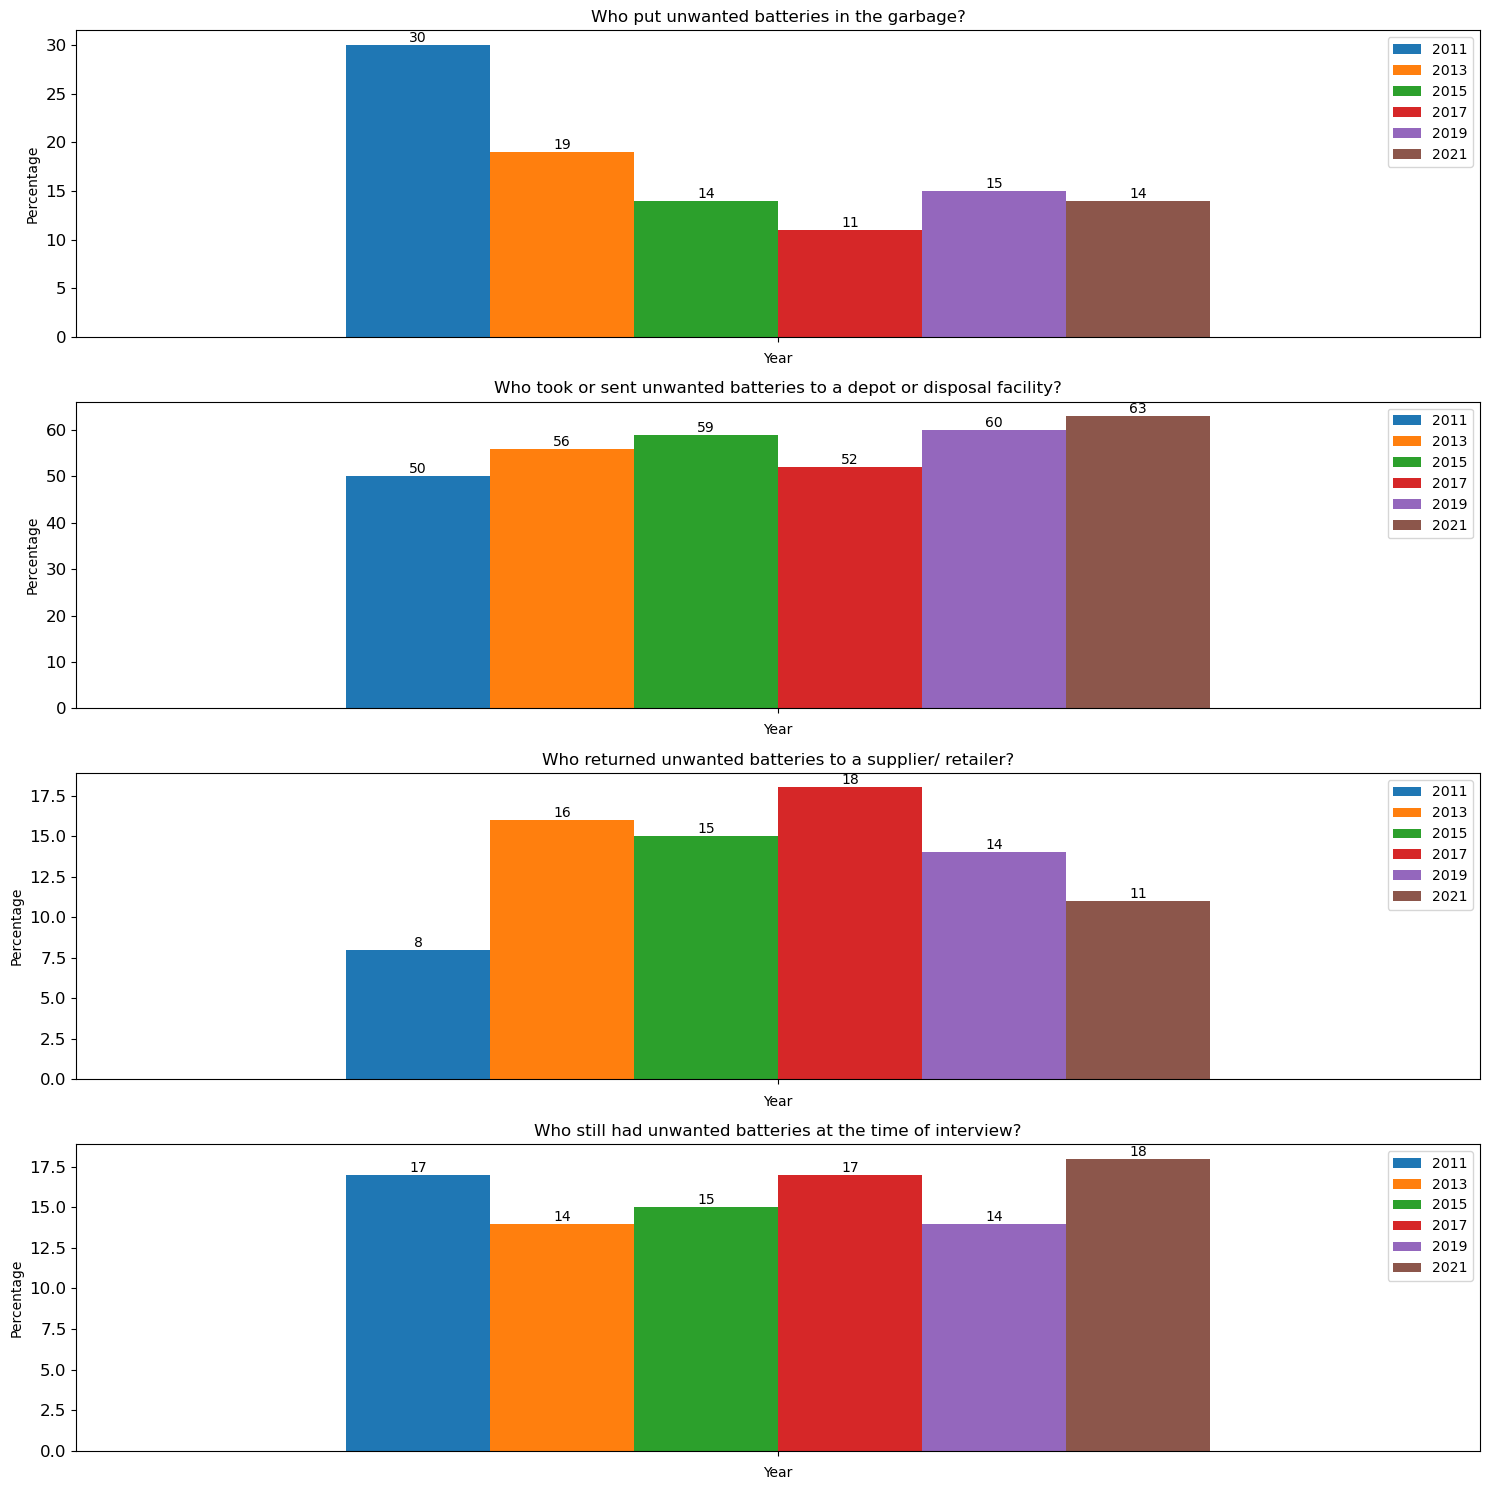

In [12]:
# Create subplots for Plots 2 to 5
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(4, 1, figsize=(15, 15))

# Plot 2: Bar graph from Montrealers who put unwanted batteries in the garbage
batteries_garbage = batteries[batteries['field'].str.contains('garbage')].iloc[:, 1:]
batteries_garbage.plot(kind='bar', ax=ax2, width=0.8, fontsize=12)
ax2.set_xticklabels('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
ax2.set_title('Who put unwanted batteries in the garbage?')
add_bar_labels(ax2)

# Plot 3: Bar graph for Montrealers who took or sent unwanted batteries to a depot or disposal facility
batteries_depot = batteries[batteries['field'].str.contains('drop-off centre')].iloc[:, 1:]
batteries_depot.plot(kind='bar', ax=ax3, width=0.8, fontsize=12)
ax3.set_xticklabels('')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage')
ax3.set_title('Who took or sent unwanted batteries to a depot or disposal facility?')
add_bar_labels(ax3)

# Plot 4: Bar graph for Montrealers who returned unwanted batteries to a supplier/ retailer
batteries_return = batteries[batteries['field'].str.contains('Returned dead')].iloc[:, 1:]
batteries_return.plot(kind='bar', ax=ax4, width=0.8, fontsize=12)
ax4.set_xticklabels('')
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage')
ax4.set_title('Who returned unwanted batteries to a supplier/ retailer?')
add_bar_labels(ax4)

# Plot 5: Bar graph for Montrealers who still had unwanted batteries at the time of interview
batteries_still = batteries[batteries['field'].str.contains('Still had')].iloc[:, 1:]
batteries_still.plot(kind='bar', ax=ax5, width=0.8, fontsize=12)
ax5.set_xticklabels('')
ax5.set_xlabel('Year')
ax5.set_ylabel('Percentage')
ax5.set_title('Who still had unwanted batteries at the time of interview?')
add_bar_labels(ax5)

# Adjust the layout and spacing
plt.tight_layout()

# Combine the two sets of subplots into a single plot
plt.subplot(411)

# Save the combined plot
fig2.savefig(file_path / 'batteries_combined_plot.png')